### Student Data Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('../Datasets/student.csv')
print(data.head())
print(data.shape)

   Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62
(1000, 3)


### Steps involved in the whole process after problem statement given
    1. Read Data
    2. Variable Identification-- ID will be ignored during modeling, target is the dependent variable, rest others are 
       independent variables used for model building
    3. Univariate Analysis-- Tabular method-describe() for continous ; value_counts for categorical,
        Graphical-histogram/Boxplot/
    4. Bivariate Analysis-- For continous -continous variables-- scatter plot,corr() 
                            For continous-categorical variables-- Bar plot,2 sample t test
                            For categorical-categorical variables-- crosstab,chisquare test
                            
    5. Missing value--Impute
    6. Outlier --transform or Binning 
    7. Variable Transformation-- log/standard scalar/
    8. Model Building-- Regression

<AxesSubplot:ylabel='Density'>

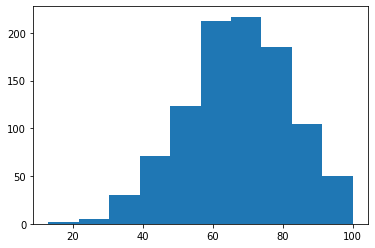

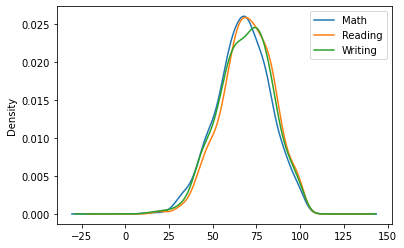

In [9]:
plt.hist(data['Math'])
data.plot.kde()

<AxesSubplot:>

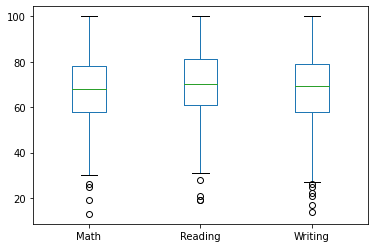

In [10]:
data.plot.box()

In [11]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

Math       4
Reading    4
Writing    6
dtype: int64

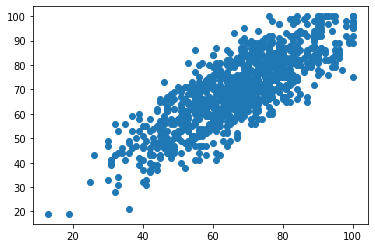

In [4]:
plt.scatter(data['Math'],data['Reading'])

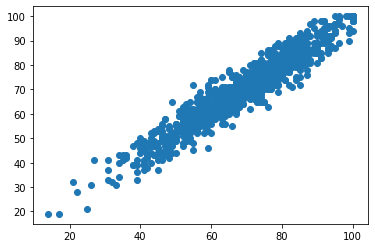

In [5]:
plt.scatter(data['Writing'],data['Reading'])

In [6]:
#Data of writing and reading more corelated
data.corr()

,Math,Reading,Writing
Math,1.000000,0.806469,0.801160
Reading,0.806469,1.000000,0.952226
Writing,0.801160,0.952226,1.000000


### Simple Basic Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,r2_score
reg=LinearRegression()
x=data.drop(['Reading'],axis=1)
y=data['Reading']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
reg=reg.fit(x_train,y_train)
pred=reg.predict(x_test)
mse=mean_squared_error(y_test,pred)
R2=r2_score(y_test,pred)
rmse=np.sqrt(mse)
print("R2:",R2,"\nrmse:",rmse)m

R2: 0.9125029013455754 
rmse: 4.220187169477375


In [24]:
from sklearn.linear_model import Lasso,Ridge
Las=Lasso(alpha=0.1)
Las=Las.fit(x_train,y_train)
pred_las=Las.predict(x_test)
mse=mean_squared_error(y_test,pred_las)
R2=r2_score(y_test,pred_las)
rmse=np.sqrt(mse)

print("R2:",R2,"\nrmse:",rmse)

R2: 0.9125019736100181 
rmse: 4.22020954283248


In [26]:
df=pd.concat([x_train,y_train,x_test,y_test],axis=1)

In [27]:
df.to_csv('../Explanation/splitdata.csv')

In [29]:
reg.coef_,reg.intercept_

(array([0.11188289, 0.82758801]), 5.583248077403383)

In [31]:
from sklearn.linear_model import Lasso,Ridge
rid=Ridge(alpha=0.01)
rid=rid.fit(x_train,y_train)
pred_rid=rid.predict(x_test)
mse=mean_squared_error(y_test,pred_rid)
R2=r2_score(y_test,pred_rid)
rmse=np.sqrt(mse)

print("R2:",R2,"\nrmse:",rmse)

R2: 0.9125029037061145 
rmse: 4.22018711255025


In [39]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=15)
knn=knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
mse=mean_squared_error(y_test,pred_knn)
R2=r2_score(y_test,pred_knn)
rmse=np.sqrt(mse)

print("R2:",R2,"\nrmse:",rmse)


R2: 0.9051595657755711 
rmse: 4.3937126796265495


In [45]:
import xgboost as xg 
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 20) 
xgb_r=xgb_r.fit(x_train,y_train)
pred_xgb_r=xgb_r.predict(x_test)
mse=mean_squared_error(y_test,pred_xgb_r)
R2=r2_score(y_test,pred_xgb_r)
rmse=np.sqrt(mse)

print("R2:",R2,"\nrmse:",rmse)
  

[14:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[14:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
R2: 0.8989611787263156 
rmse: 4.535018072841073


In [49]:
from sklearn.datasets import load_boston
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [53]:
## data divided in boston.data and boston.target
print(boston.data,boston.target)
# to get boston feature names
print(boston.feature_names)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]] [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [54]:
## Theare 13 features in independent features and one in target
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [58]:
#converting the numpy array to Dataframe
type(boston.data)
df=pd.DataFrame(boston.data,columns=[boston.feature_names])

In [59]:
##Adding target also
df['Price']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [67]:
## Univariate and Bivariate Analysis
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


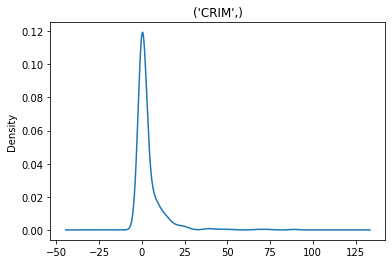

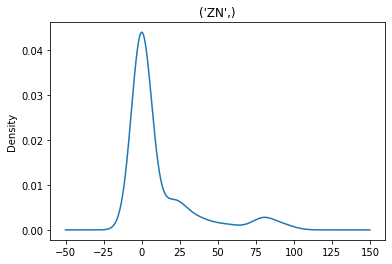

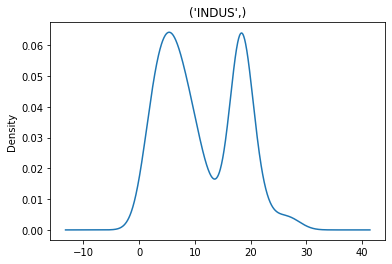

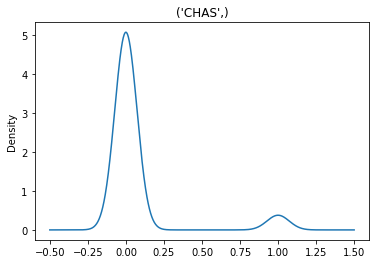

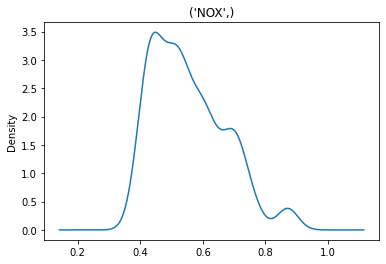

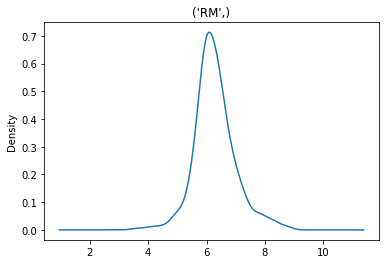

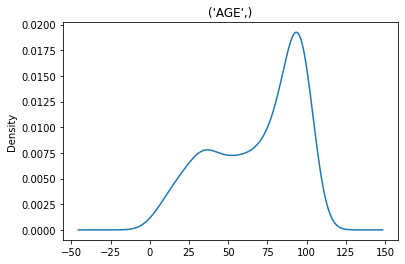

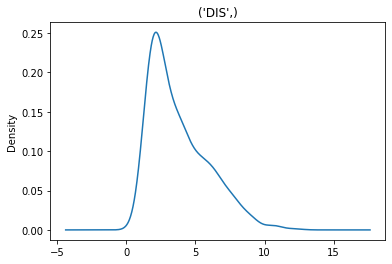

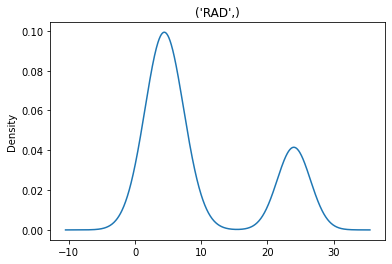

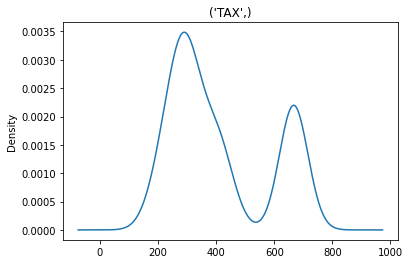

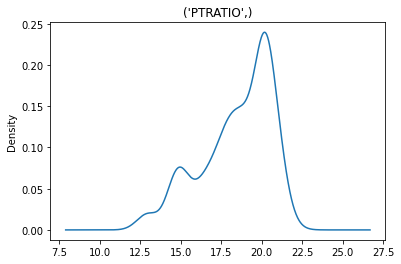

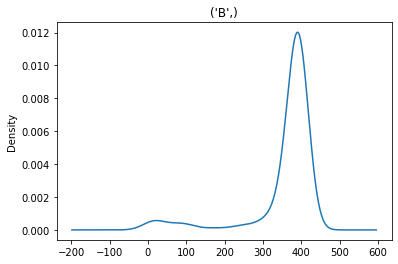

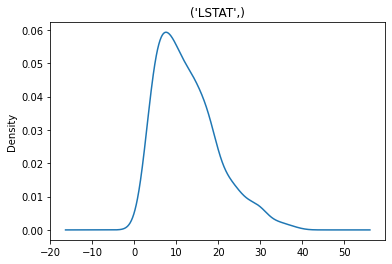

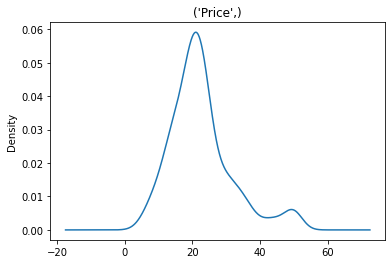

In [79]:
for col in df.columns:
    df[col].plot.kde()
    plt.title(col)
    plt.show()

Feature: 0, Score: 1.29291
Feature: 1, Score: 13.96161
Feature: 2, Score: 0.73447
Feature: 3, Score: -0.00713
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.20076
Feature: 6, Score: 20.61977
Feature: 7, Score: 0.05549
Feature: 8, Score: 0.71746
Feature: 9, Score: 38.62653
Feature: 10, Score: -0.03047
Feature: 11, Score: 20.40582
Feature: 12, Score: 21.07647


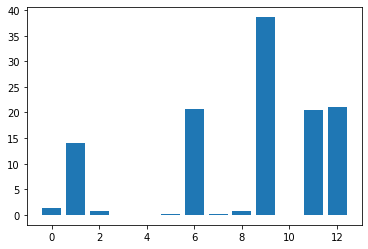

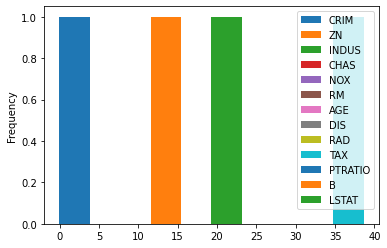

In [104]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X, y = df.drop(['Price'],axis=1),df['Price']
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
df1=df.drop(['Price'],axis=1)
imp=pd.DataFrame([importance],columns=df1.columns)
pyplot.bar([x for x in range(len(importance))], importance)

pyplot.show()

In [105]:
imp

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.292906,13.961615,0.734469,-0.007127,0.0,0.200763,20.619766,0.05549,0.717461,38.626535,-0.030473,20.405823,21.076472


Feature: 0, Score: 0.05002
Feature: 1, Score: 0.00074
Feature: 2, Score: 0.00156
Feature: 3, Score: 0.00091
Feature: 4, Score: 0.04941
Feature: 5, Score: 0.57663
Feature: 6, Score: 0.01370
Feature: 7, Score: 0.07388
Feature: 8, Score: 0.00021
Feature: 9, Score: 0.01372
Feature: 10, Score: 0.00691
Feature: 11, Score: 0.01519
Feature: 12, Score: 0.19713


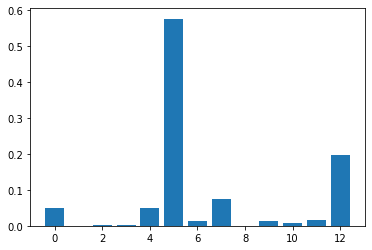

In [106]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(df.drop(['Price'],axis=1), df['Price'])
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.01779
Feature: 1, Score: 0.00137
Feature: 2, Score: 0.01510
Feature: 3, Score: 0.00365
Feature: 4, Score: 0.05188
Feature: 5, Score: 0.23821
Feature: 6, Score: 0.00903
Feature: 7, Score: 0.04953
Feature: 8, Score: 0.01097
Feature: 9, Score: 0.03896
Feature: 10, Score: 0.04516
Feature: 11, Score: 0.00857
Feature: 12, Score: 0.50977


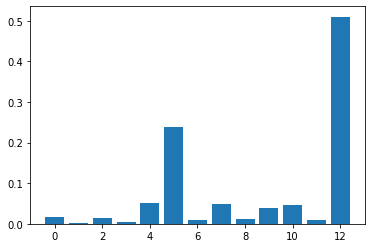

In [107]:
# xgboost for feature importance on a regression problem
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = XGBRegressor()
# fit the model
model.fit(df.drop(['Price'],axis=1), df['Price'])
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,r2_score

x=df.drop(['Price'],axis=1)
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

reg=LinearRegression()          
reg=reg.fit(x_train,y_train)
pred=reg.predict(x_test)
mse=mean_squared_error(y_test,pred)
R2=r2_score(y_test,pred)
rmse=np.sqrt(mse)
print('Linear Regression',"R2:",R2,"\nrmse:",rmse)

from sklearn.linear_model import Lasso,Ridge
Las=Lasso(alpha=0.1)
Las=Las.fit(x_train,y_train)
pred_las=Las.predict(x_test)
mse=mean_squared_error(y_test,pred_las)
R2=r2_score(y_test,pred_las)
rmse=np.sqrt(mse)
print('Lasso Regression',"R2:",R2,"\nrmse:",rmse)


from sklearn.linear_model import Lasso,Ridge
rid=Ridge(alpha=0.01)
rid=rid.fit(x_train,y_train)
pred_rid=rid.predict(x_test)
mse=mean_squared_error(y_test,pred_rid)
R2=r2_score(y_test,pred_rid)
rmse=np.sqrt(mse)

print('Ridge Regression',"R2:",R2,"\nrmse:",rmse)

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=15)
knn=knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
mse=mean_squared_error(y_test,pred_knn)
R2=r2_score(y_test,pred_knn)
rmse=np.sqrt(mse)

print('KNeighborsRegressor',"R2:",R2,"\nrmse:",rmse)


import xgboost as xg 
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 20) 
xgb_r=xgb_r.fit(x_train,y_train)
pred_xgb_r=xgb_r.predict(x_test)
mse=mean_squared_error(y_test,pred_xgb_r)
R2=r2_score(y_test,pred_xgb_r)
rmse=np.sqrt(mse)

print('XGBRegressor',"R2:",R2,"\nrmse:",rmse)
  

In [ ]:
https://machinelearningmastery.com/calculate-feature-importance-with-python/
    https://www.analyticsvidhya.com/blog/2015/10/regression-python-beginners/?utm_source=blog&utm_medium=RideandLassoRegressionarticle

In [ ]:
https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/
https://www.analyticsvidhya.com/blog/2015/10/regression-python-beginners/?utm_source=blog&utm_medium=RideandLassoRegressionarticle   